In [11]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

/tmp/ipykernel_397697/81008072.py:11: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_data = linkage(data, method='ward', metric='euclidean', optimal_ordering=True)


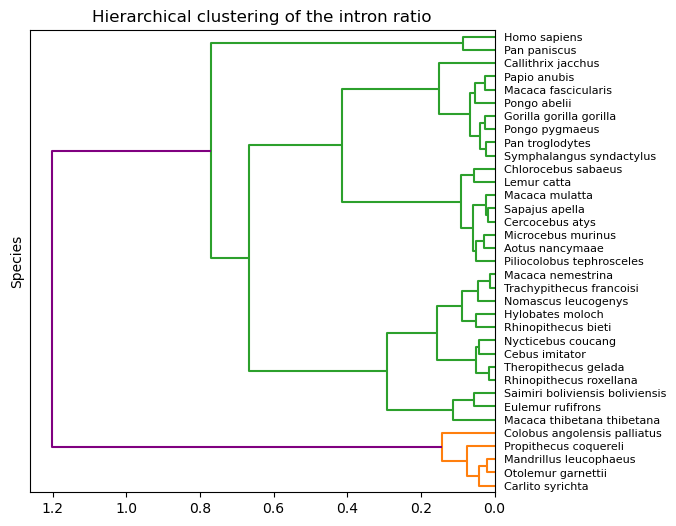

In [50]:
df_matrix = []
with open('/home/collot/stage/collot/collot/out_stats/matrix_intron_ratio.csv') as matrix:
    reader = csv.reader(matrix)
    rows = list(reader)
    species = rows[0][1:]  
    data_values = [row[1:] for row in rows[1:]]  

data = pd.DataFrame(data_values, columns=species, index=species)
data = data.apply(pd.to_numeric)
condensed_matrix = squareform(data.values)
linkage_data = linkage(data, method='ward', metric='euclidean', optimal_ordering=True)
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
dn = dendrogram(linkage_data, labels=data.index.tolist(), orientation='left', above_threshold_color='purple')
plt.ylabel('Species')
plt.title('Hierarchical clustering of the intron ratio')
plt.show()